<h1> Feature Selection </h1>  

In order to improve our model we looked at feature importance and correlation. Instead of running the features with every feature in our model- that is all the tracking information for 3 seconds as well as the extra plays information. We only looked into the play features and their importance to the result_fair_catch feature. This was partly due to the correlation map taking a long time to run with thousands of features. 

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib
from sklearn import tree

In [10]:
df= pd.read_csv('dfupdated.csv')
df=df.drop(columns=['Unnamed: 0','playId','gameId'])

In [11]:
def print_analysis(y_pred,y_v):
    cnf_matrix = metrics.confusion_matrix(y_v, y_pred)
    print("Confusion matrix: ")
    print(cnf_matrix)
    print("")
    print("Accuracy:",round(metrics.accuracy_score(y_v, y_pred),4))
    print("Precision:",round(metrics.precision_score(y_v, y_pred, zero_division=1),4))
    print("Recall:",round(metrics.recall_score(y_v, y_pred),4))

    auc = metrics.roc_auc_score(y_v, y_pred)
    print("AUC:",round(auc,4))
    print("")
    return

In [12]:
def calculation(model_name,x,y,xv,yv):
    model = model_name
    model_name.fit(x,y)
    y_pred = model_name.predict(xv)
    print_analysis(y_pred,yv)
    return


We ran a quick model below only using the play information without the tracking data to classify fair catch. The results were similat to our random forest in our model building(1) notebook around 70& accurate and AUC~.52 with a much lower precision than accuracy.

In [13]:
X=df.iloc[:,0:28]
y=df[['result_Fair Catch']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=0)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Default c = 1 c 5 is the best one I think
for c in [1,2,3,4,5,6,7,8,9,10]: 
    calculation(LogisticRegression(C=c,max_iter=10000),X_train_scaled,y_train.values.ravel(),X_test_scaled,y_test)

Confusion matrix: 
[[730  19]
 [298  27]]

Accuracy: 0.7048
Precision: 0.587
Recall: 0.0831
AUC: 0.5289

Confusion matrix: 
[[729  20]
 [297  28]]

Accuracy: 0.7048
Precision: 0.5833
Recall: 0.0862
AUC: 0.5297

Confusion matrix: 
[[729  20]
 [296  29]]

Accuracy: 0.7058
Precision: 0.5918
Recall: 0.0892
AUC: 0.5313

Confusion matrix: 
[[729  20]
 [296  29]]

Accuracy: 0.7058
Precision: 0.5918
Recall: 0.0892
AUC: 0.5313

Confusion matrix: 
[[728  21]
 [296  29]]

Accuracy: 0.7048
Precision: 0.58
Recall: 0.0892
AUC: 0.5306

Confusion matrix: 
[[729  20]
 [296  29]]

Accuracy: 0.7058
Precision: 0.5918
Recall: 0.0892
AUC: 0.5313

Confusion matrix: 
[[728  21]
 [296  29]]

Accuracy: 0.7048
Precision: 0.58
Recall: 0.0892
AUC: 0.5306

Confusion matrix: 
[[729  20]
 [295  30]]

Accuracy: 0.7067
Precision: 0.6
Recall: 0.0923
AUC: 0.5328

Confusion matrix: 
[[728  21]
 [295  30]]

Accuracy: 0.7058
Precision: 0.5882
Recall: 0.0923
AUC: 0.5321

Confusion matrix: 
[[729  20]
 [295  30]]

Accuracy: 0

Using the feature selection code and ideas from the machine learning article in towards data science. 

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs         Score
23               gameClock  1.780997e+07
27                   nflId  1.352574e+03
22          yardlineNumber  1.016638e+03
21               yardsToGo  1.483952e+02
5               kicktype_A  1.146703e+02
6               kicktype_N  3.973023e+01
12         kickDirActual_L  1.028739e+01
26  absoluteYardlineNumber  8.848042e+00
25     preSnapVisitorScore  8.446040e+00
9        kickDirintended_L  7.730751e+00


[0.00334365 0.00359388 0.00450574 0.00545644 0.00983531 0.0171403
 0.01221747 0.00038119 0.00701132 0.00594922 0.00616119 0.0071439
 0.00527275 0.00486003 0.0140688  0.01759098 0.01663758 0.01514593
 0.00204857 0.01128292 0.01103938 0.12224066 0.12331548 0.13241255
 0.09941123 0.10037171 0.11285265 0.12870918]


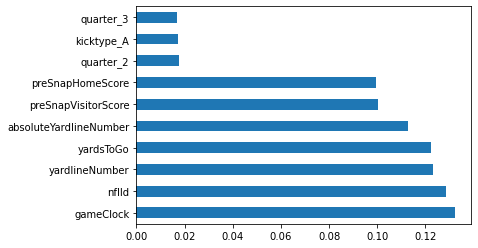

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y.values.ravel())
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

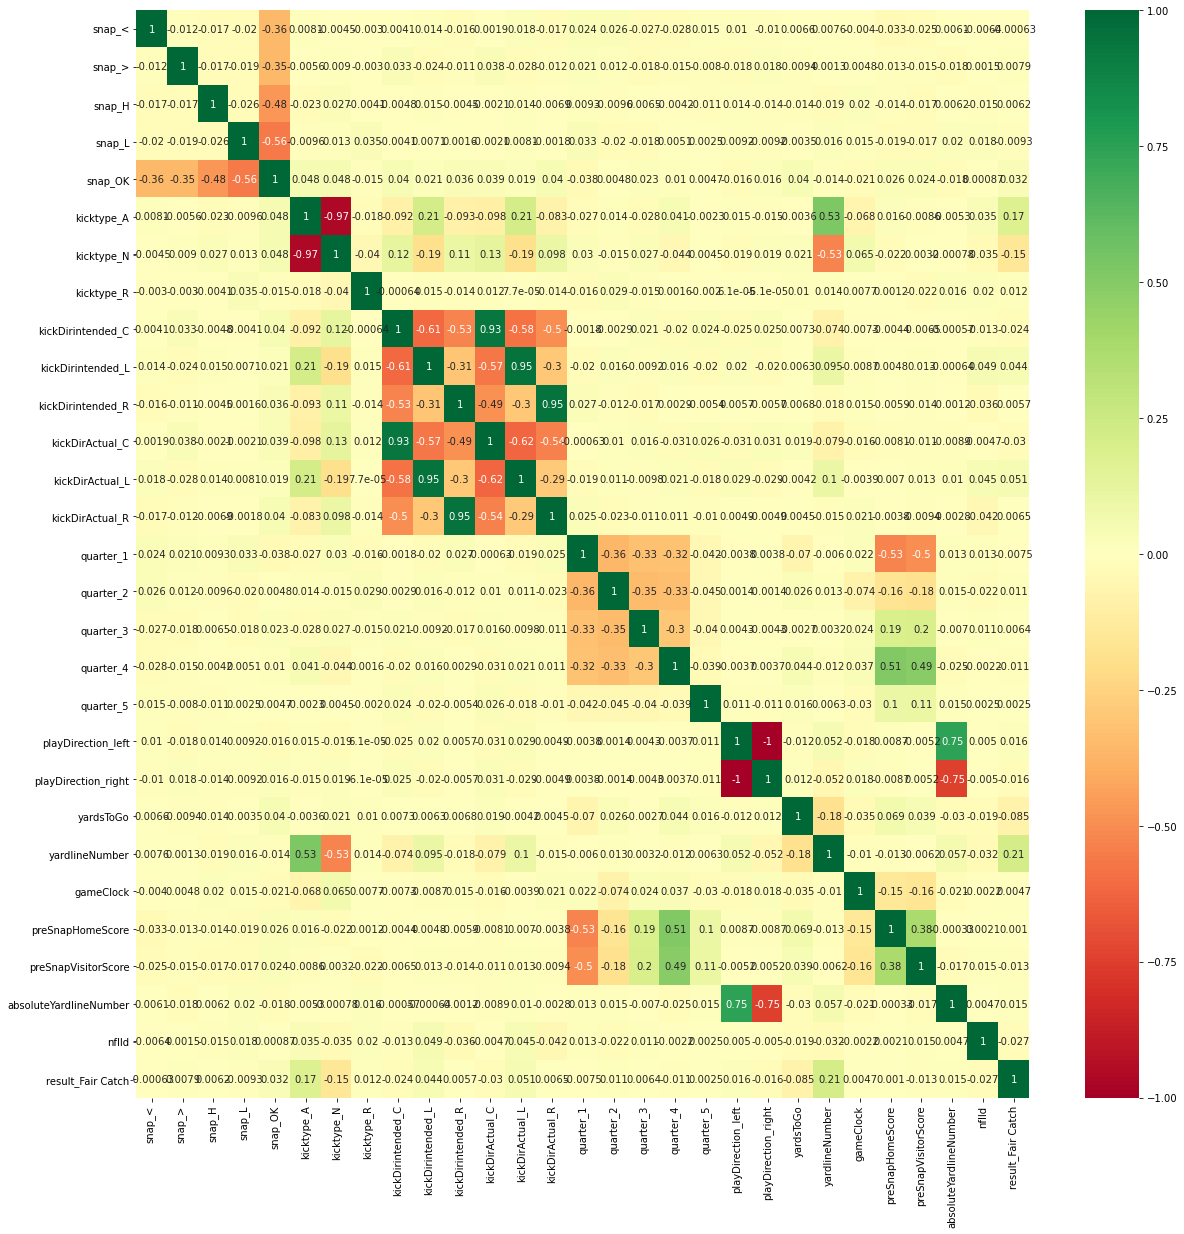

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
dfshrunk=df.iloc[:,0:28]
X=df.iloc[:,0:28]
y=df[['result_Fair Catch']]
df1= pd.concat([dfshrunk,y], axis=1)
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

The corelation map shows levels of correlation mainly for the features that were to be expected for example all the snap types relate to each other as well as the play direction. These were the hot encoded columns so it make sense the map would show this correlation. The map does show the kicktype, yards_to_go, and yardlinenumber as showing a correlation with result_fairCatch. 

Reference: Rahil Shaikh: Feature Selection Techniques in Machine Learning with Python, Towards Data Science.